In [1]:
import cv2
from keras.callbacks import *
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.utils import to_categorical
import sys
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
def read_img(file_name, color_inv_norm=True):
    """
    read a image from local file system
    :param file_name:
    :param color_inv_norm:
    :return:
    """
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

    if color_inv_norm:
        img = 255 - img

        # img = remove_back(img, np.ones((5, 5), np.uint8))

#         img = img / 255.0
    else:
        img[img < 50] = 0
        img = img / 255.0

    return img

In [31]:
def get_non0_index_scope(l):
    """

    :param l:
    :return:
    """
    if l[0]:
        start = 0
    else:
        start = l.index(True)
    l.reverse()
    if l[0]:
        end = 0
    else:
        end = l.index(True)
    end = len(l) - end
    return start, end


def get_min_content_area(img):
    """

    :param img:
    :return:
    """
    col_proj = (np.sum(img, axis=0) != 0).tolist()
    row_proj = (np.sum(img, axis=1) != 0).tolist()
    col_start, col_end = get_non0_index_scope(col_proj)
    row_start, row_end = get_non0_index_scope(row_proj)

    return row_start, row_end, col_start, col_end


def get_resize_padding_img(img, size=None, padding=None):
    """

    :param img:
    :param size:
    :param padding:
    :return:
    """
    if size and padding:
        sub_img = cv2.resize(img, size)
        sub_img = np.pad(sub_img, padding, mode='constant')
        sub_img = np.pad(sub_img, ((3,), (3,)), mode='constant')
    else:
        sub_img = cv2.resize(img, (28, 28))
    return sub_img


def preprocessing(img):
    img = 255 - img
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img[img < 0.16] = 0.0
    img[img > 0] += 0.2
    img[img > 1.] = 1.
    row_start, row_end, col_start, col_end = get_min_content_area(img)
    sub_img = img[row_start: row_end, col_start: col_end]
    
    if col_end - col_start < row_end - row_start:  # 铅直边较长
        change_rate = (row_end - row_start - 42) / float((row_end - row_start))
        changed_width = int((col_end - col_start) * (1 - change_rate))

        if changed_width % 2 == 1:
            changed_width += 1
        if changed_width == 0:
            changed_width = 2
        pad = (42 - changed_width) / 2
        padding = ((0,), (int(pad),))
        sub_img = get_resize_padding_img(sub_img, size=(changed_width, 42), padding=padding)

    else:  # 水平边较长
        change_rate = (col_end - col_start - 42) / float((col_end - col_start))
        changed_height = int((row_end - row_start) * (1 - change_rate))

        if changed_height % 2 == 1:
            changed_height += 1
        if changed_height == 0:
            changed_height = 2
        pad = (42 - changed_height) / 2
        padding = ((int(pad),), (0,))
        sub_img = get_resize_padding_img(sub_img, size=(42, changed_height), padding=padding)

    return sub_img

In [32]:
from keras.models import *
model = load_model('cnn3_gen.h5')

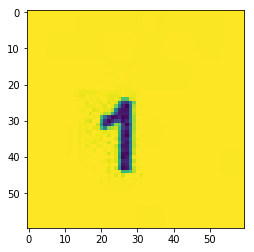

In [41]:
img = cv2.imread('D:\\pyproj\\answer_sheet_discern\\pageno.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

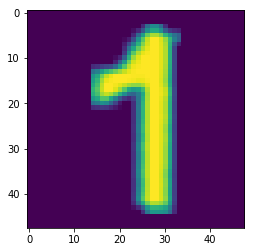

In [42]:
plt.imshow(preprocessing(img))

In [43]:
print('reco result: ', np.argmax(model.predict(np.expand_dims(np.expand_dims(preprocessing(img), -1), 0))))

reco result:  1


In [44]:
str(np.argmax(model.predict(np.expand_dims(np.expand_dims(preprocessing(img), -1), 0))))

'1'

In [45]:
 np.argmax(model.predict(np.expand_dims(np.expand_dims(preprocessing(img), -1), 0)))

1

In [46]:
np.argmax(model.predict(np.expand_dims(np.expand_dims(preprocessing(img), -1), 0)))

1

In [48]:
print(preprocessing(img))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
a = np.random.randn(3,4)

In [50]:
a

array([[-0.16145007, -0.06866183, -0.83392476, -1.51120024],
       [ 0.5513889 , -0.7154115 , -1.44300021, -0.78205979],
       [ 2.6368181 ,  1.35012789,  0.02209672,  0.46991432]])

In [51]:
a[a<0.2] = 0

In [52]:
a

array([[0.        , 0.        , 0.        , 0.        ],
       [0.5513889 , 0.        , 0.        , 0.        ],
       [2.6368181 , 1.35012789, 0.        , 0.46991432]])

In [54]:
np.sum(a>0)

4